### Load Data from PostgreSQL

In [1]:
!pip install sqlalchemy psycopg2


In [2]:
import sqlalchemy
import psycopg2
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote, quote_plus
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [3]:
# Database connection details
db_user = "postgres"
db_password = quote("131412aA@")  # Encode special characters
db_host = "127.0.0.1"  # Use IP instead of 'localhost'
db_port = "5432"
db_name = "bank_churn"

# Create SQLAlchemy engine
engine = create_engine(f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")

try:
    # Test the connection
    with engine.connect() as conn:
        print("SQLAlchemy Connection Successful!")

    # Load transformed train data
    query = "SELECT * FROM transformed_train_data;"
    df_train = pd.read_sql(query, engine)

    # Load transformed API data
    query = "SELECT * FROM transformed_api_data;"
    df_api = pd.read_sql(query, engine)

    # Display data info
    df_train.info()
    print(df_train.head())

except Exception as e:
    print(f"Error: {e}")


SQLAlchemy Connection Successful!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825170 entries, 0 to 825169
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 825170 non-null  int64  
 1   CustomerId         825170 non-null  int64  
 2   Surname            825170 non-null  object 
 3   CreditScore        825170 non-null  float64
 4   Gender             825170 non-null  int64  
 5   Age                825170 non-null  float64
 6   Tenure             825170 non-null  float64
 7   Balance            825170 non-null  float64
 8   NumOfProducts      825170 non-null  float64
 9   HasCrCard          825170 non-null  float64
 10  IsActiveMember     825170 non-null  float64
 11  EstimatedSalary    825170 non-null  float64
 12  Exited             825170 non-null  int64  
 13  Geography_France   825170 non-null  bool   
 14  Geography_Germany  825170 non-null  bool   
 15  Geography_Spain  

In [4]:
# Database connection details
db_user = "postgres"
db_password = quote_plus("131412aA@")  # Encode password safely
db_host = "localhost"
db_port = "5432"
db_name = "bank_churn"

# Create SQLAlchemy engine
engine = create_engine(f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")

# Load transformed train data
query = "SELECT * FROM transformed_train_data;"
df_train = pd.read_sql(query, engine)

# Drop non-numeric columns for correlation analysis
df_corr = df_train.drop(columns=["id", "CustomerId", "Surname", "version"])

# Display the first few rows
df_corr.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,BalancePerProduct
0,0.569231,0,-0.596932,3.0,-0.883161,2.0,1.0,0.0,1.369481,0,True,False,False,-0.441580
1,0.472189,0,-0.596932,1.0,-0.883161,2.0,1.0,1.0,-1.254081,0,True,False,False,-0.441580
2,0.592899,0,0.258795,10.0,-0.883161,2.0,1.0,0.0,1.437418,0,True,False,False,-0.441580
3,0.363314,0,-0.474685,2.0,1.486914,1.0,1.0,1.0,-0.557016,0,True,False,False,1.486914
4,0.682840,0,-0.596932,5.0,-0.883161,2.0,1.0,1.0,-1.938764,0,False,False,True,-0.441580


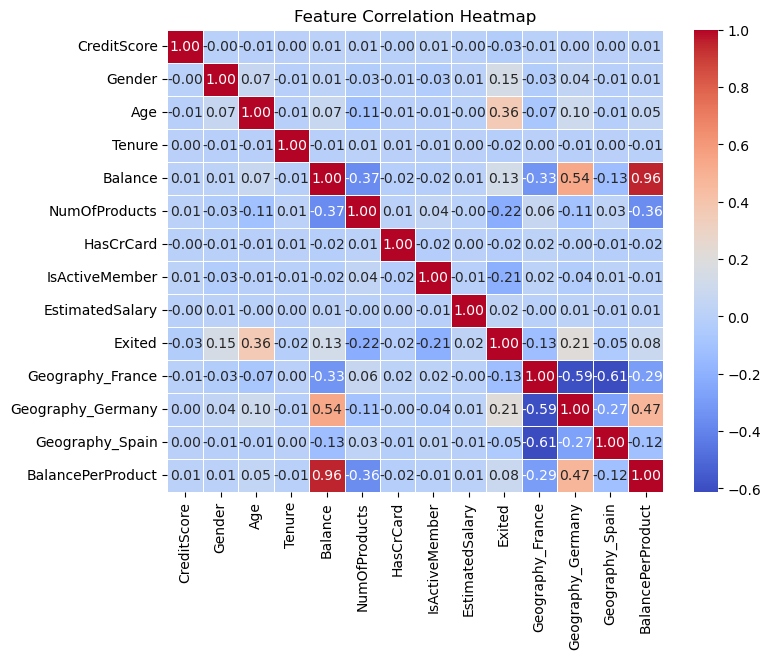

In [5]:
# Compute correlation matrix
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7952\2710775511.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


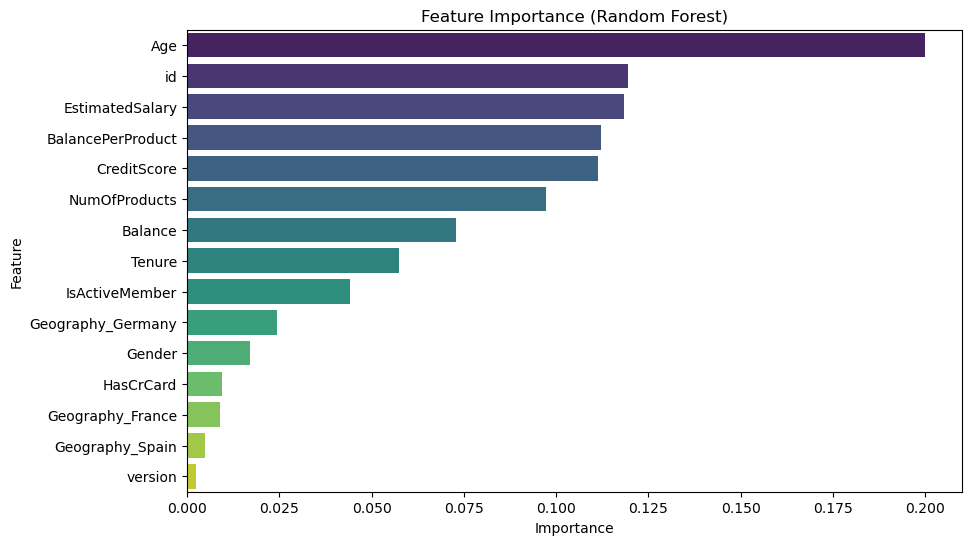

,Feature,Importance
3,Age,0.199930
0,id,0.119504
9,EstimatedSalary,0.118370
13,BalancePerProduct,0.112133
1,CreditScore,0.111286
6,NumOfProducts,0.097207
5,Balance,0.072909
4,Tenure,0.057378
8,IsActiveMember,0.044246
11,Geography_Germany,0.024370


In [6]:
# Drop non-numeric columns (e.g., CustomerId, Surname)
df_train_filtered = df_train.drop(columns=["CustomerId", "Surname"])

# Separate features and target variable
X = df_train_filtered.drop(columns=["Exited"])  # Features
y = df_train_filtered["Exited"]  # Target

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()

# Display importance scores
importance_df


              Feature  Importance
4                 Age    0.186098
7       NumOfProducts    0.108730
0                  id    0.098654
14  BalancePerProduct    0.097918
10    EstimatedSalary    0.097767
1          CustomerId    0.097077
2         CreditScore    0.091903
6             Balance    0.061510
5              Tenure    0.049731
9      IsActiveMember    0.043545
12  Geography_Germany    0.025324
3              Gender    0.016632
8           HasCrCard    0.009429
11   Geography_France    0.009080
13    Geography_Spain    0.005541
15            version    0.001060


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7952\966533667.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


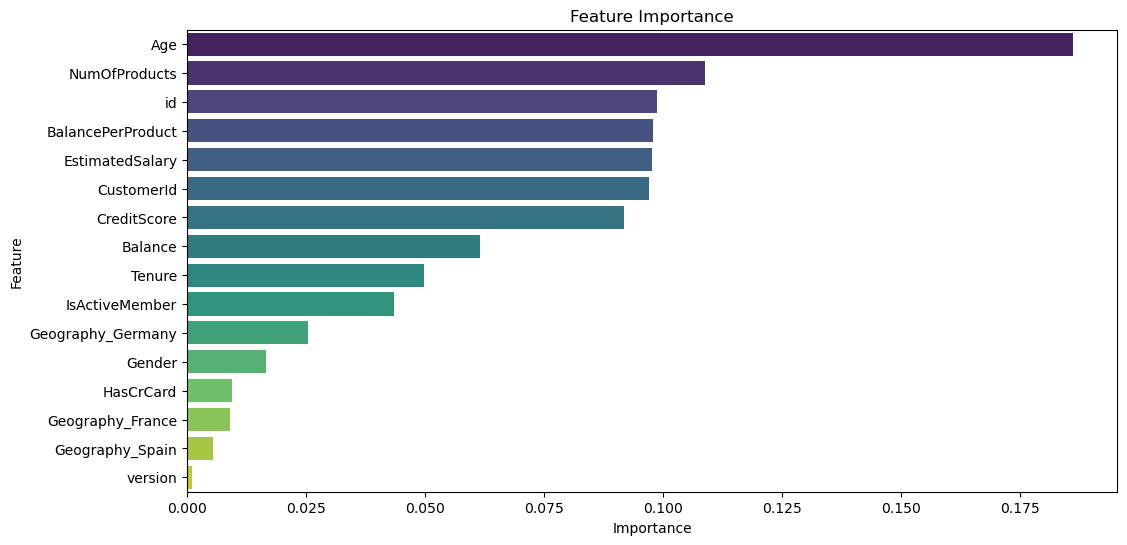

Dropped Features: ['HasCrCard', 'Geography_France', 'Geography_Spain', 'version']
Remaining Features: ['id', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany', 'BalancePerProduct']


In [7]:
# Compute Feature Importance and Drop Least Important Features
# Load Data
df = df_train.copy()  # Using training data for feature selection

# Separate Features and Target
X = df.drop(columns=['Exited', 'Surname'])  # Dropping 'Surname' as it's not useful
y = df['Exited']

# Train a Random Forest Model to Get Feature Importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get Feature Importance Scores
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display Feature Importance
print(feature_importance)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.show()

# Drop Features with Importance Below a Certain Threshold (e.g., 0.01)
threshold = 0.01
drop_features = feature_importance[feature_importance['Importance'] < threshold]['Feature'].tolist()
df_selected = df.drop(columns=drop_features)

print(f"Dropped Features: {drop_features}")
print(f"Remaining Features: {df_selected.columns.tolist()}")


In [8]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecting only numerical features (excluding categorical ones)
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
                      'IsActiveMember', 'EstimatedSalary', 'BalancePerProduct']

# Creating a new dataframe with selected numerical features
df_numerical = df[numerical_features]

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_numerical.columns
vif_data["VIF"] = [variance_inflation_factor(df_numerical.values, i) for i in range(df_numerical.shape[1])]

# Display VIF results
print(vif_data)


             Feature        VIF
0        CreditScore   6.023217
1                Age   1.012533
2             Tenure   3.617496
3            Balance  11.545290
4      NumOfProducts   6.399841
5     IsActiveMember   1.935280
6    EstimatedSalary   1.000146
7  BalancePerProduct  11.559027


In [9]:
# Dropping BalancePerProduct and recalculating VIF
numerical_features_reduced = ['CreditScore', 'Age', 'Tenure', 'Balance', 
                              'NumOfProducts', 'IsActiveMember', 'EstimatedSalary']

df_numerical_reduced = df[numerical_features_reduced]

# Recalculate VIF
vif_data_reduced = pd.DataFrame()
vif_data_reduced["Feature"] = df_numerical_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(df_numerical_reduced.values, i) for i in range(df_numerical_reduced.shape[1])]

print(vif_data_reduced)


           Feature       VIF
0      CreditScore  5.969972
1              Age  1.008645
2           Tenure  3.606584
3          Balance  1.094107
4    NumOfProducts  6.397434
5   IsActiveMember  1.930652
6  EstimatedSalary  1.000145


In [10]:
# Dropping NumOfProducts and recalculating VIF
numerical_features_final = ['CreditScore', 'Age', 'Tenure', 'Balance', 
                            'IsActiveMember', 'EstimatedSalary']

df_numerical_final = df[numerical_features_final]

# Recalculate VIF
vif_data_final = pd.DataFrame()
vif_data_final["Feature"] = df_numerical_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(df_numerical_final.values, i) for i in range(df_numerical_final.shape[1])]

print(vif_data_final)


           Feature       VIF
0      CreditScore  3.600882
1              Age  1.004874
2           Tenure  3.188248
3          Balance  1.005212
4   IsActiveMember  1.853379
5  EstimatedSalary  1.000144


In [11]:
# RFE:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Drop non-numeric and irrelevant columns
df = df.drop(columns=['id', 'Surname'])  # Adjust column names if different

# Separate features and target variable
X = df.drop(columns=['Exited'])  
y = df['Exited']

# Initialize logistic regression model
model = LogisticRegression(max_iter=1000)

# Apply RFE (select top 5 features, adjust if needed)
selector = RFE(model, n_features_to_select=5)
selector.fit(X, y)

# Create DataFrame to display feature rankings
rfe_results = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': selector.ranking_
}).sort_values(by='Ranking')

print(rfe_results)


              Feature  Ranking
0          CustomerId        1
3                 Age        1
4              Tenure        1
6       NumOfProducts        1
14            version        1
8      IsActiveMember        2
5             Balance        3
10   Geography_France        4
7           HasCrCard        5
11  Geography_Germany        6
13  BalancePerProduct        7
1         CreditScore        8
12    Geography_Spain        9
2              Gender       10
9     EstimatedSalary       11


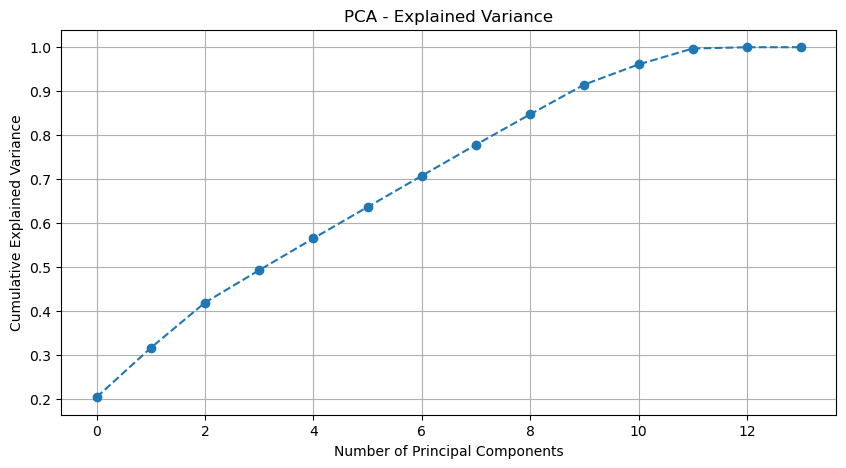

array([0.20386175, 0.11227484, 0.10302703, 0.07365425, 0.07240371,
       0.07130368, 0.07107727, 0.07065331, 0.06919026, 0.06769904,
       0.04573717, 0.03618161, 0.00293608, 0.        ])

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Drop unnecessary columns
df_selected = df.drop(columns=['CustomerId', 'version'])

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Apply PCA
pca = PCA()
pca.fit(df_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid()
plt.show()

# Display the explained variance of each component
explained_variance


# Feature Selection Summary  

## Tests Performed  

**1 Variance Inflation Factor VIF**  
- Identified multicollinearity among features  
- Dropped features with high VIF to reduce redundancy  
- Final VIF results showed acceptable values after dropping correlated features  

**2 Recursive Feature Elimination RFE**  
- Ranked features based on importance for predictive modeling  
- Selected features with the lowest ranking values as the most important  
- Some features like NumOfProducts and Age were consistently ranked high  

**3 Principal Component Analysis PCA**  
- Analyzed explained variance for dimensionality reduction  
- Around 9 to 10 components explained most of the variance approximately 90 percent  
- Used as a guideline but did not directly determine feature selection  

## Final Selected Features  

After analyzing the results from all tests and considering domain knowledge the following features were retained  

- CreditScore  
- Age  
- Tenure  
- Balance  
- NumOfProducts  
- IsActiveMember  
- EstimatedSalary  
- Geography_Germany  
- BalancePerProduct  

These features ensure minimal redundancy maintain interpretability and contribute to predictive performance  
